### Decribing Bank Data
Analysis is done by Opeyemi Farinde on Jupyter Notebook
June 2019. After analysis, the below table shows the results. 

In [53]:
Analysed_data = pd.DataFrame({"LIkelihood":[Likelihood_male, Likelihood_female],
                           "Impact":[impact_male, impact_female],
                           "Sustainability": [sustainability_male, sustainability_female],
                           "Confidence": [Confidence, Confidence],
                           "Pulse": [Pulse_male, Pulse_female]}, index = ["Male", "Female"])
Entire_data

,LIkelihood,Impact,Sustainability,Confidence,Pulse
Male,0.547963,0.004849,-0.009883,0.8663,2231.5888
Female,0.452037,-0.005878,0.001307,0.8663,178.4578


This notebook describes the steps I followed in describing the data sorted and available in CSV. 

Objectives of decription:
A. Data owner required me to describe the data:
1. He is interested in knowing the distribution by sex of the data across three regions in Nigeria.
2. I am required to calculate average on all parameters 
3. The averages are required by him to determine the pulse of events.
 
B. Steps:
1. I imported Pandas, Numpy and Matplotlib and read-in the csv.
2. CSV contains 10,000 rows of data and 210,000 data points.
3. I wanted to see the columns to pick headers with numeric value.
4. Since I am classifying based on geographical locations, I deployed Pandas "GROUPBY" function
5. NC is North Central
6. SW is South West
7. SE is South East

The following sets of equations are deployed in calculating the following:
1. Likelihood_male = male/totalGender
2. Likelihood_female = female/totalGender
3. AverageBalance_Male_Today = Sum_Male_Balance_Today/Count_Male_Balance_Today
4. AverageBalance_Female_Today = Sum_Female_Balance_Today/Count_Female_Balance_Today
5. AverageBalance_Male_Lastweek = Sum_Male_Balance_Lastweek/Count_Male_Balance_Lastweek
6. AverageBalance_Female_Lastweek = Sum_Female_Balance_Lastweek/Count_Female_Balance_Lastweek
7. AverageBalance_All_Today = Sum_AverageBalance_All_Today/Count_AverageBalance_All_Today
8. AverageBalance_All_Lastweek = Sum_AverageBalance_All_Lastweek/Count_AverageBalance_All_Lastweek
9. impact_male = (AverageBalance_Male_Today - AverageBalance_All_Today)/ AverageBalance_All_Today
10. impact_female = (AverageBalance_Female_Today - AverageBalance_All_Today)/ AverageBalance_All_Today
11. sustainability_male = (AverageBalance_Male_Today/AverageBalance_Male_Lastweek) - 1
12. sustainability_female = (AverageBalance_Female_Today/AverageBalance_Female_Lastweek) - 1
13. Confidence = Total_customer/Total_in_Bank
14. Pulse_male = impact_male * sustainability_male * Confidence *  Likelihood_male
15. Pulse_female = impact_female * sustainability_female * confidence * Likelihood_female
16. Pulse = (Pulse_male * Likelihood_male) + ((Pulse_female * Likelihood_female)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
Raw_Bank_data = pd.read_csv("C:\\Users\Alaka\Desktop\Bank_data.csv")
Raw_Bank_data.head(3)

,RowNumber,CustomerId,Surname,Geography,Gender,Age,Profession,Tenure,Balance (last week),Balance (today),...,HasCrCard,Loan amount this month,Loan age,Loan type,Due loan payment (this month),No of visits to bank this month,Enrolled to Mobile banking today,Deposits this month,EstimatedSalary,Salary account
0,2093,15757408,Lo,South West,Male,38,Skilled,3,275376.2024,250898.09,...,0,14335,1,Business,1148.751531,0,No,0.00000,81054.00,0
1,3281,15715622,To Rot,North Central,Female,57,Non-Skilled,3,168705.0162,238387.56,...,0,15758,2,Auto,0.000000,0,Yes,0.00000,147964.99,1
2,8734,15714241,Haddon,South West,Male,42,Skilled,9,115230.0125,222267.63,...,0,0,0,No Loan,0.000000,2,Yes,18135.95428,101108.85,1


In [2]:
Raw_Bank_data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'Geography', 'Gender', 'Age',
       'Profession', 'Tenure', 'Balance (last week)', 'Balance (today)',
       'Number of accounts', 'HasCrCard', 'Loan amount this month', 'Loan age',
       'Loan type', 'Due loan payment (this month)',
       'No of visits to bank this month', 'Enrolled to Mobile banking today',
       'Deposits this month', 'EstimatedSalary', 'Salary account'],
      dtype='object')

In [3]:
Bank_data = Raw_Bank_data[['RowNumber', 'Geography', 'Gender', 'Age',
       'Profession', 'Tenure', 'Balance (last week)', 'Balance (today)',
       'Number of accounts', 'HasCrCard', 'Loan amount this month', 'Loan age',
       'Loan type', 'Due loan payment (this month)',
       'No of visits to bank this month', 'Enrolled to Mobile banking today',
       'Deposits this month', 'EstimatedSalary', 'Salary account']]

In [26]:
BalanceNOTZero_today = Bank_data[Bank_data['Balance (today)']>0]
BalanceNOTZero_lastweek = Bank_data[Bank_data['Balance (last week)']>0]
print("Customers without zero last week: ", BalanceNOTZero_lastweek['Balance (last week)'].count())
print("Customers without zero today: ", BalanceNOTZero_today['Balance (today)'].count())

Customers without zero last week:  8744
Customers without zero today:  8663


In [5]:
Bank_gender = BalanceNOTZero_today.groupby("Gender")
Male_total = pd.DataFrame(Bank_gender.get_group("Male"))
Female_total = pd.DataFrame(Bank_gender.get_group("Female"))
print("Total Male is: ", Male_total.Gender.count())
print("Total Female is: ",Female_total.Gender.count())
print("Total Gender is: ",BalanceNOTZero_today.Gender.count())

Total Male is:  4747
Total Female is:  3916
Total Gender is:  8663


In [6]:
Avg_male_bal_lw = Male_total['Balance (last week)'].sum()/Male_total['Balance (last week)'].count()
Avg_male_bal_today = Male_total['Balance (today)'].sum()/Male_total['Balance (today)'].count()
Avg_bal_all_last_week = BalanceNOTZero_lastweek['Balance (last week)'].sum()/BalanceNOTZero_lastweek['Balance (last week)'].count()
Avg_bal_all_today = BalanceNOTZero_today['Balance (today)'].sum()/BalanceNOTZero_today['Balance (today)'].count()
print("Male average balance last week is: ", Avg_male_bal_lw)
print("Male average balance today is: ", Avg_male_bal_today)

print("All average balance last week is: ", Avg_bal_all_last_week )
print("All average balance today is: ", Avg_bal_all_today)

Male average balance last week is:  89686.98623649676
Male average balance today is:  88800.64901622076
All average balance last week is:  88006.68828664765
All average balance today is:  88372.1017984532


In [7]:
BalanceNOTZero_lastweek.set_index("RowNumber", inplace = True)
BalanceNOTZero_today.set_index("RowNumber", inplace = True)
grouped_data_lw = BalanceNOTZero_lastweek.groupby("Geography")
grouped_data_td =BalanceNOTZero_today.groupby("Geography")
NC_lw = pd.DataFrame(grouped_data_lw.get_group("North Central"))
SW_lw = pd.DataFrame(grouped_data_lw.get_group("South West"))
SE_lw = pd.DataFrame(grouped_data_lw.get_group("South East"))
NC_td = pd.DataFrame(grouped_data_td.get_group("North Central"))
SW_td = pd.DataFrame(grouped_data_td.get_group("South West"))
SE_td = pd.DataFrame(grouped_data_td.get_group("South East"))

In [8]:
Grouped_data_summary_lastweek = pd.DataFrame(grouped_data_lw.mean())
Grouped_data_summary_today = pd.DataFrame(grouped_data_td.mean())
Summary_geography = pd.concat([Grouped_data_summary_lastweek, Grouped_data_summary_today],
                    keys = ["Last week summary", "Today summary"], axis = 0)
Summary_geography

Age    Tenure  Balance (last week)  \
                  Geography                                                 
Last week summary North Central  38.601180  4.971681         92320.750629   
                  South East     39.771622  5.009964        120240.351180   
                  South West     38.793322  5.052021         54439.401279   
Today summary     North Central  38.570404  5.007773         93541.123955   
                  South East     39.771622  5.009964        120240.351180   
                  South West     38.935920  5.054824         55090.053983   

                                 Balance (today)  Number of accounts  \
                  Geography                                            
Last week summary North Central     91864.909879            1.410324   
                  South East       119730.116134            1.519729   
                  South West        53885.895258            1.564851   
Today summary     North Central     93145.287441            1.408371   
                  South East       119730.116134            1.519729   
                  South West        54679.127807            1.556426   

                                 HasCrCard  Loan amount this month  Loan age  \
                  Geography                                                    
Last week summary North Central   0.650147             8387.489381  1.501180   
                  South East      0.713830             8796.725389  1.551614   
                  South West      0.589104             8443.911775  1.513181   
Today summary     North Central   0.653812             8376.778176  1.520179   
                  South East      0.713830             8796.725389  1.551614   
                  South West      0.601638             8447.528658  1.506942   

                                 Due loan payment (this month)  \
                  Geography                                      
Last week summary North Central                     203.000042   
                  South East                        234.315216   
                  South West                        214.160541   
Today summary     North Central                     212.917393   
                  South East                        234.315216   
                  South West                        213.709286   

                                 No of visits to bank this month  \
                  Geography                                        
Last week summary North Central                         1.493215   
                  South East                            1.463930   
                  South West                            1.471353   
Today summary     North Central                         1.482511   
                  South East                            1.463930   
                  South West                            1.473122   

                                 Deposits this month  EstimatedSalary  \
                  Geography                                             
Last week summary North Central          3451.598328    100119.343920   
                  South East             4315.906819    101113.435102   
                  South West             1952.625642     99595.205079   
Today summary     North Central          3499.694493    100339.262990   
                  South East             4315.906819    101113.435102   
                  South West             1981.584146     99981.274856   

                                 Salary account  
                  Geography                      
Last week summary North Central        0.822714  
                  South East           0.766839  
                  South West           0.896309  
Today summary     North Central        0.820329  
                  South East           0.766839  
                  South West           0.894268

In [9]:
NC_Lastweek = BalanceNOTZero_lastweek.groupby("Gender")
SE_Lastweek = BalanceNOTZero_lastweek.groupby("Gender")
SW_Lastweek = BalanceNOTZero_lastweek.groupby("Gender")

NC_today = BalanceNOTZero_today.groupby("Gender")
SE_today = BalanceNOTZero_today.groupby("Gender")
SW_today = BalanceNOTZero_today.groupby("Gender")

NCGender_data_summary_lastweek = pd.DataFrame(NC_Lastweek.mean())
SEGender_data_summary_lastweek = pd.DataFrame(SE_Lastweek.mean())
SWGender_data_summary_lastweek = pd.DataFrame(SW_Lastweek.mean())

NCGender_data_summary_today = pd.DataFrame(NC_today.mean())
SEGender_data_summary_today = pd.DataFrame(SE_today.mean())
SWGender_data_summary_today = pd.DataFrame(SW_today.mean())

Summary_gender = pd.concat([NCGender_data_summary_lastweek, SEGender_data_summary_lastweek,
                           SWGender_data_summary_lastweek,NCGender_data_summary_today,
                           SEGender_data_summary_today, SWGender_data_summary_today],
                    keys = ["NC_LW", "SE_LW", "SW_LW", 
                           "NC_TD", "SE_TD", "SW_TD"], axis = 0)
Summary_gender

Age    Tenure  Balance (last week)  Balance (today)  \
      Gender                                                              
NC_LW Female  39.308291  4.965578         86350.594149     86393.507286   
      Male    38.741604  5.044920         89390.243003     88430.755432   
SE_LW Female  39.308291  4.965578         86350.594149     86393.507286   
      Male    38.741604  5.044920         89390.243003     88430.755432   
SW_LW Female  39.308291  4.965578         86350.594149     86393.507286   
      Male    38.741604  5.044920         89390.243003     88430.755432   
NC_TD Female  39.291113  4.980848         87737.982307     87852.614147   
      Male    38.827049  5.058985         89686.986236     88800.649016   
SE_TD Female  39.291113  4.980848         87737.982307     87852.614147   
      Male    38.827049  5.058985         89686.986236     88800.649016   
SW_TD Female  39.291113  4.980848         87737.982307     87852.614147   
      Male    38.827049  5.058985         89686.986236     88800.649016   

              Number of accounts  HasCrCard  Loan amount this month  Loan age  \
      Gender                                                                    
NC_LW Female            1.509799   0.642714             8617.984925  1.527136   
      Male              1.477120   0.653442             8444.148195  1.513224   
SE_LW Female            1.509799   0.642714             8617.984925  1.527136   
      Male              1.477120   0.653442             8444.148195  1.513224   
SW_LW Female            1.509799   0.642714             8617.984925  1.527136   
      Male              1.477120   0.653442             8444.148195  1.513224   
NC_TD Female            1.504086   0.652707             8599.068948  1.537794   
      Male              1.475880   0.655572             8457.227933  1.514430   
SE_TD Female            1.504086   0.652707             8599.068948  1.537794   
      Male              1.475880   0.655572             8457.227933  1.514430   
SW_TD Female            1.504086   0.652707             8599.068948  1.537794   
      Male              1.475880   0.655572             8457.227933  1.514430   

              Due loan payment (this month)  No of visits to bank this month  \
      Gender                                                                   
NC_LW Female                     207.901125                         1.481658   
      Male                       222.062821                         1.474391   
SE_LW Female                     207.901125                         1.481658   
      Male                       222.062821                         1.474391   
SW_LW Female                     207.901125                         1.481658   
      Male                       222.062821                         1.474391   
NC_TD Female                     211.937702                         1.476251   
      Male                       225.503876                         1.472298   
SE_TD Female                     211.937702                         1.476251   
      Male                       225.503876                         1.472298   
SW_TD Female                     211.937702                         1.476251   
      Male                       225.503876                         1.472298   

              Deposits this month  EstimatedSalary  Salary account  
      Gender                                                        
NC_LW Female          3129.458653    101058.589807        0.834422  
      Male            3280.752111     99545.204782        0.827456  
SE_LW Female          3129.458653    101058.589807        0.834422  
      Male            3280.752111     99545.204782        0.827456  
SW_LW Female          3129.458653    101058.589807        0.834422  
      Male            3280.752111     99545.204782        0.827456  
NC_TD Female          3182.577881    100737.881706        0.831716  
      Male            3294.371850    100207.773263        0.826417  
SE_TD Female          3

In [13]:
Male_average = Male_total.groupby("Geography").mean()
Male_average

,RowNumber,Age,Tenure,Balance (last week),Balance (today),Number of accounts,HasCrCard,Loan amount this month,Loan age,Due loan payment (this month),No of visits to bank this month,Deposits this month,EstimatedSalary,Salary account
Geography,,,,,,,,,,,,,,
North Central,4994.549189,38.452973,5.091351,95548.171088,94636.761222,1.381622,0.658378,8257.375135,1.526486,219.142688,1.488649,3639.355454,100704.959870,0.821622
South East,4996.712006,39.424772,5.050152,121333.577699,120259.668222,1.527356,0.720365,8711.444529,1.494681,242.539436,1.471884,4411.071020,99905.033959,0.758359
South West,4908.123972,38.767236,5.028463,56486.412967,55785.546641,1.543327,0.598355,8479.478811,1.516762,218.767253,1.453510,1961.167691,99877.988128,0.888678


In [16]:
Female_average = Female_total.groupby("Geography").mean()
Female_average

,RowNumber,Age,Tenure,Balance (last week),Balance (today),Number of accounts,HasCrCard,Loan amount this month,Loan age,Due loan payment (this month),No of visits to bank this month,Deposits this month,EstimatedSalary,Salary account
Geography,,,,,,,,,,,,,,
North Central,4838.405351,38.715719,4.904348,91057.487036,91299.650990,1.441472,0.648161,8524.534448,1.512375,205.213851,1.474916,3326.869893,99886.728388,0.818729
South East,5004.213747,40.154233,4.965633,119034.411448,119145.966471,1.511316,0.706622,8890.798826,1.614417,225.243067,1.455155,4210.931054,102446.424124,0.776194
South West,4653.282573,39.153094,5.088762,53292.298647,53254.658607,1.573290,0.605863,8406.394137,1.494300,207.197359,1.498371,2007.869500,100114.252313,0.901466


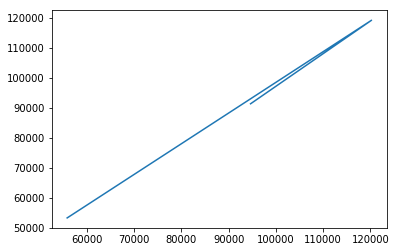

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(Male_average["Balance (today)"], Female_average["Balance (today)"])

In [20]:
Likelihood_male = Male_total.Gender.count()/BalanceNOTZero_today.Gender.count()
Likelihood_female = Female_total.Gender.count()/BalanceNOTZero_today.Gender.count()
print("Total Male is: ", Male_total.Gender.count())
print("Total Female is: ",Female_total.Gender.count())
print("Total Gender is: ", BalanceNOTZero_today.Gender.count())
print("Likelihood male is: ", Likelihood_male)
print("Likelihood female is: ", Likelihood_female) 

Total Male is:  4747
Total Female is:  3916
Total Gender is:  8663
Likelihood male is:  0.5479625995613528
Likelihood female is:  0.4520374004386471


In [21]:
AverageBalance_Male_Today= Male_total['Balance (today)'].sum()/Male_total['Balance (today)'].count()
AverageBalance_Male_Lastweek= Male_total['Balance (last week)'].sum()/Male_total['Balance (last week)'].count()
print("Average_Balance_Male_Today is: ", AverageBalance_Male_Today)
print("Average_Balance_Male_Lastweek is: ", AverageBalance_Male_Lastweek)

Average_Balance_Male_Today is:  88800.64901622076
Average_Balance_Male_Lastweek is:  89686.98623649676


In [27]:
AverageBalance_Female_Today= Female_total['Balance (today)'].sum()/Female_total['Balance (today)'].count()
AverageBalance_Female_Lastweek= Female_total['Balance (last week)'].sum()/Female_total['Balance (last week)'].count()
print("Average_Balance_Female_Today is: ", AverageBalance_Female_Today)
print("Average_Balance_Female_Lastweek is: ", AverageBalance_Female_Lastweek)

Average_Balance_Female_Today is:  87852.61414708887
Average_Balance_Female_Lastweek is:  87737.98230689402


In [28]:
Average_Balance_All_Today = BalanceNOTZero_today['Balance (today)'].mean()
Average_Balance_All_Lastweek = BalanceNOTZero_lastweek['Balance (last week)'].mean()
print("Average balance for all today: ", Average_Balance_All_Today)
print("Average balance for last week: ", Average_Balance_All_Lastweek)

Average balance for all today:  88372.10179845293
Average balance for last week:  88006.6882866477


In [29]:
impact_male = (AverageBalance_Male_Today-Average_Balance_All_Today)/Average_Balance_All_Today
impact_female = (AverageBalance_Female_Today-Average_Balance_All_Today)/Average_Balance_All_Today
print("Male impact is: ", impact_male)
print("female impact is: ", impact_female)

Male impact is:  0.0048493496142617875
female impact is:  -0.005878412313298146


In [36]:
sustainability_male = (AverageBalance_Male_Today/AverageBalance_Male_Lastweek)-1
sustainability_female = (AverageBalance_Female_Today/AverageBalance_Female_Lastweek)-1
print("Sustainability male is: ", sustainabililty_male)
print("Sustainability female is: ", sustainability_female)

Sustainability male is:  -0.009882562202935374
Sustainability female is:  0.0013065246906851513


In [31]:
Confidence = 8663/10000
print("Confidence: ", Confidence)

Confidence:  0.8663


In [32]:
Pulse_male = 800*0.92*Confidence*3.5
Pulse_female = 100*1.03*Confidence*2
print("Male pulse: ", Pulse_male)
print("Female pulse: ", Pulse_female)

Male pulse:  2231.5887999999995
Female pulse:  178.4578


In [33]:
Pulse = (Pulse_male*3.5)+(Pulse_female*2)
print("Entire pulse: ", Pulse)

Entire pulse:  8167.476399999999
